In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [243]:
data= pd.read_csv(r"C:\Users\hp\Downloads\Fish_dataset.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [244]:
print(np.__version__)

2.0.1


<Axes: xlabel='Species', ylabel='count'>

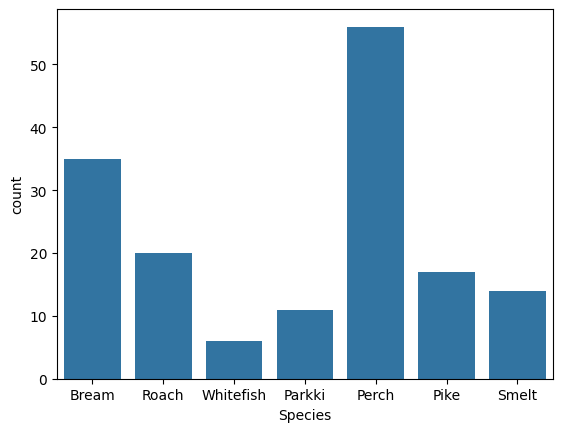

In [245]:
sns.countplot(x='Species',data =data)

In [246]:
fish= data.drop(['Species'],axis=1)
fish.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [247]:
fish.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [248]:
fish.isna().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: >

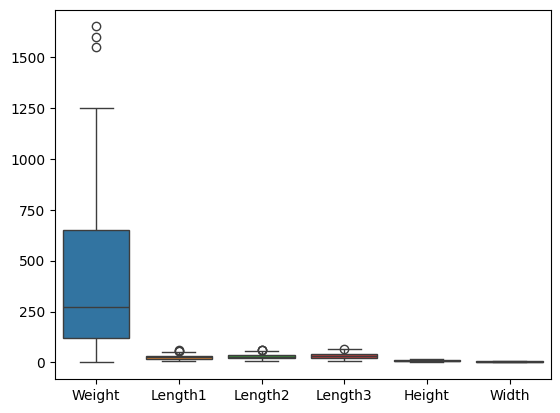

In [249]:
sns.boxplot(data=fish)

In [250]:
for i in fish:
    if fish[i] .dtypes in ('int64','float64'):
        q1=fish[i].quantile(0.25)
        q3=fish[i].quantile(0.75)
        iqr=q3-q1
        ul=q3+1.5*iqr
        ll=q1-1.5*iqr
        fish[i].clip(upper=ul,lower=ll,inplace=True)
    

C:\Users\hp\AppData\Local\Temp\ipykernel_12228\2798032464.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fish[i].clip(upper=ul,lower=ll,inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12228\2798032464.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

<Axes: >

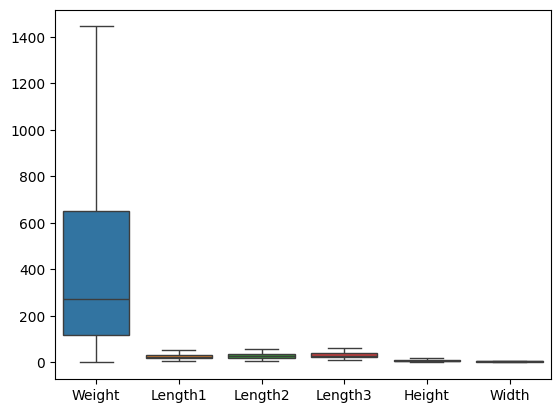

In [251]:
sns.boxplot(data=fish)

<Axes: xlabel='Weight', ylabel='Count'>

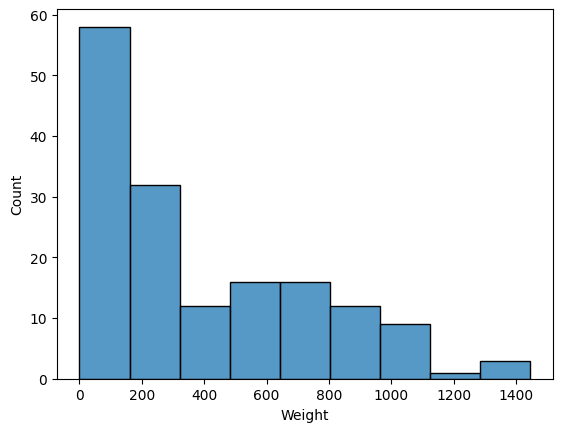

In [252]:
sns.histplot(x='Weight',data=fish)

In [253]:
#Data fish is positively skewed
#lets do transformation

<Axes: xlabel='Weight', ylabel='Count'>

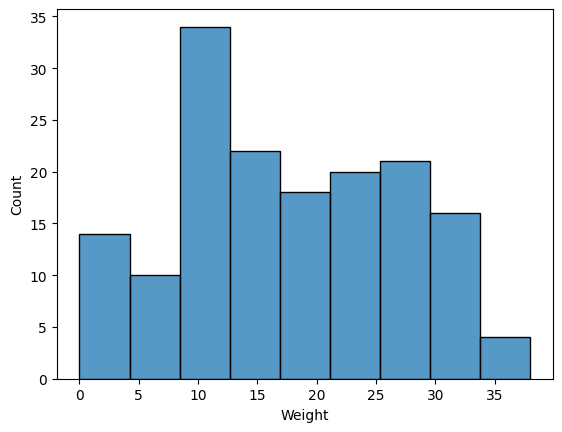

In [254]:
fish['Weight'] = np.sqrt(fish['Weight'])
sns.histplot(x='Weight',data=fish)

In [255]:
print(type(fish))

<class 'pandas.core.frame.DataFrame'>


In [256]:
fish

,Weight,Length1,Length2,Length3,Height,Width
0,15.556349,23.2,25.4,30.0,11.5200,4.0200
1,17.029386,24.0,26.3,31.2,12.4800,4.3056
2,18.439089,23.9,26.5,31.1,12.3778,4.6961
3,19.052559,26.3,29.0,33.5,12.7300,4.4555
4,20.736441,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,3.492850,11.5,12.2,13.4,2.0904,1.3936
155,3.660601,11.7,12.4,13.5,2.4300,1.2690
156,3.492850,12.1,13.0,13.8,2.2770,1.2558
157,4.438468,13.2,14.3,15.2,2.8728,2.0672


In [257]:
#data partitioning

In [258]:
X=fish.drop(['Weight'],axis=1)
y=fish[['Weight']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=77)

In [259]:
train=pd.concat([X_train,y_train],axis=1)

In [260]:
train.head()

,Length1,Length2,Length3,Height,Width,Weight
136,40.1,43.0,45.8,7.7860,5.1296,23.237900
83,19.0,21.0,22.5,5.9175,3.3075,10.723805
15,29.4,32.0,37.2,15.4380,5.5800,24.494897
9,28.5,30.7,36.2,14.2266,4.9594,22.360680
110,32.0,34.5,36.5,10.2565,6.3875,23.579652


In [261]:
correlation=train.corr()
correlation

,Length1,Length2,Length3,Height,Width,Weight
Length1,1.000000,0.999415,0.990175,0.666702,0.872533,0.931865
Length2,0.999415,1.000000,0.992676,0.682065,0.878889,0.937368
Length3,0.990175,0.992676,1.000000,0.744894,0.875787,0.948433
Height,0.666702,0.682065,0.744894,1.000000,0.789390,0.834244
Width,0.872533,0.878889,0.875787,0.789390,1.000000,0.946192
Weight,0.931865,0.937368,0.948433,0.834244,0.946192,1.000000


VSM

In [263]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Model=sfs(lreg,n_features_to_select=4,direction='backward',scoring='r2')
Model.fit(X_train,y_train)

AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=4, scoring='r2')

In [264]:
Model.feature_names_in_

array(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype=object)

In [265]:
Model.get_feature_names_out()

array(['Length1', 'Length2', 'Height', 'Width'], dtype=object)

## Model Building

In [267]:
X_train=X_train.loc[:,['Length1', 'Length2', 'Length3', 'Width']]
X_train

,Length1,Length2,Length3,Width
136,40.1,43.0,45.8,5.1296
83,19.0,21.0,22.5,3.3075
15,29.4,32.0,37.2,5.5800
9,28.5,30.7,36.2,4.9594
110,32.0,34.5,36.5,6.3875
...,...,...,...,...
117,36.5,39.0,41.4,6.0030
152,11.3,11.8,13.1,1.1659
37,17.5,18.8,21.2,2.9044
84,19.0,21.0,22.5,3.6675


In [268]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Length1,Length2,Length3,Width,Weight
136,40.1,43.0,45.8,5.1296,23.237900
83,19.0,21.0,22.5,3.3075,10.723805
15,29.4,32.0,37.2,5.5800,24.494897
9,28.5,30.7,36.2,4.9594,22.360680
110,32.0,34.5,36.5,6.3875,23.579652


In [269]:
from sklearn.linear_model import LinearRegression
Model3=LinearRegression()
Model3.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [270]:
Model3.intercept_

array([-7.10814583])

In [271]:
Model3.coef_

array([[ 0.27602655, -0.86320601,  0.95146888,  2.7986116 ]])

In [272]:
Model3.feature_names_in_

array(['Length1', 'Length2', 'Length3', 'Width'], dtype=object)

### Model
y = -479.19 + 69.6078 * Length1 -82.3284 * Length2 + 31.2525 * Length3 + 93.1531* Width

## prediction for train

In [344]:
train['fittedvalue']=np.round(Model3.predict(X_train),2)
train['Residual']=np.round(train.fittedvalue-train.Weight)
train['fitted_value_original'] = train.fittedvalue**2
train

,Length1,Length2,Length3,Width,Weight,fittedvalue,Residual,fittedweight,fitted_value_original
136,40.1,43.0,45.8,5.1296,23.237900,24.78,2.0,614.0484,614.0484
83,19.0,21.0,22.5,3.3075,10.723805,10.67,-0.0,113.8489,113.8489
15,29.4,32.0,37.2,5.5800,24.494897,24.40,-0.0,595.3600,595.3600
9,28.5,30.7,36.2,4.9594,22.360680,22.58,0.0,509.8564,509.8564
110,32.0,34.5,36.5,6.3875,23.579652,24.55,1.0,602.7025,602.7025
...,...,...,...,...,...,...,...,...,...
117,36.5,39.0,41.4,6.0030,25.495098,25.49,-0.0,649.7401,649.7401
152,11.3,11.8,13.1,1.1659,3.146427,1.55,-2.0,2.4025,2.4025
37,17.5,18.8,21.2,2.9044,8.831761,9.79,1.0,95.8441,95.8441
84,19.0,21.0,22.5,3.6675,11.180340,11.68,0.0,136.4224,136.4224


### Assumptions of model
### Linearity

<Axes: xlabel='Length1', ylabel='Weight'>

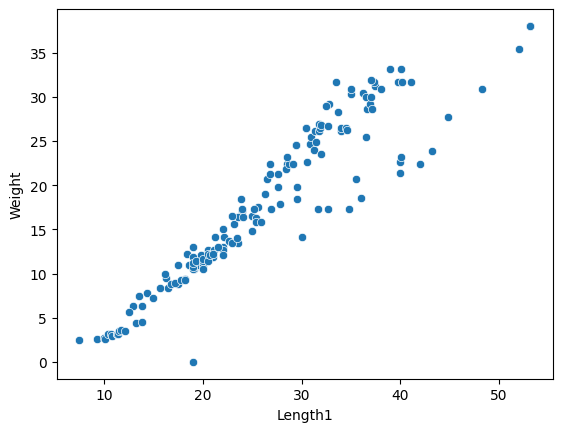

In [277]:
sns.scatterplot(x='Length1',y='Weight',data=fish)

### Homoscedoscity (Constant Varience)

<Axes: xlabel='fittedvalue', ylabel='Residual'>

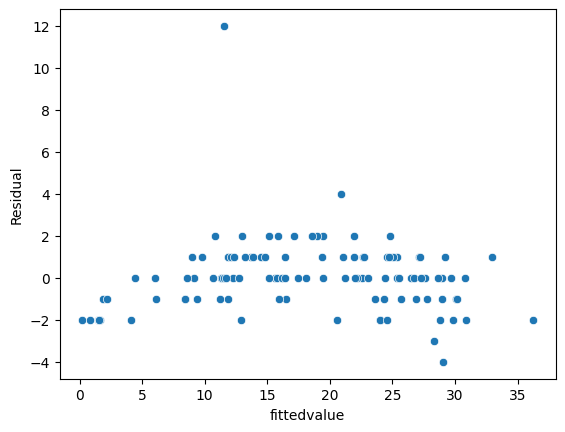

In [279]:
sns.scatterplot(x='fittedvalue', y='Residual',data=train)

### Normality

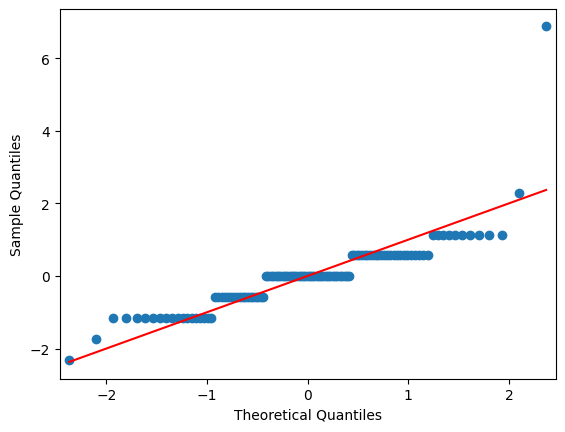

In [281]:

import statsmodels.api as sm
fig=sm.qqplot(train['Residual'],line='s',fit=True)
plt.show()

### Model Error

<Axes: xlabel='Residual', ylabel='Count'>

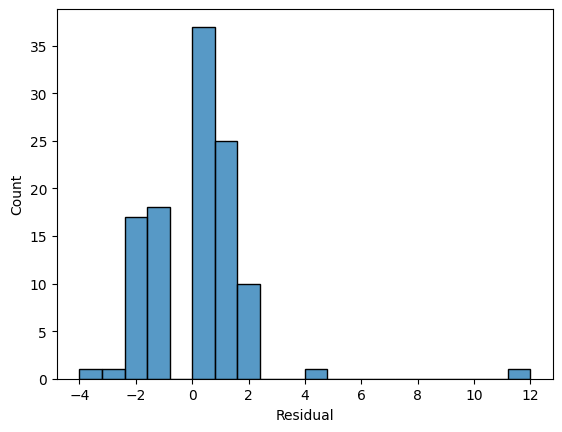

In [283]:

sns.histplot(train['Residual'])

In [284]:
from sklearn.metrics import r2_score
r2=r2_score(train.fittedvalue,train.Weight)
print('r2 score on model performance on train ',np.round(r2,2)*100)

r2 score on model performance on train  96.0


### Prediction on Test

In [286]:
X_test=X_test.loc[:,['Length1', 'Length2', 'Length3', 'Width']]

In [287]:
test=pd.concat([X_test,y_test],axis=1)

In [363]:
test.head()

,Length1,Length2,Length3,Width,Weight,fittedvalue,residual,fitted_value_original
142,53.175,57.25,64.0,6.1440,38.013156,36.24,1.77,1313.3376
122,37.100,40.00,42.5,6.6300,28.635642,27.60,1.04,761.7600
150,10.800,11.30,12.6,1.2852,2.949576,1.70,1.25,2.8900
5,26.800,29.70,34.7,4.9274,21.213203,21.46,-0.25,460.5316
26,32.000,35.00,40.6,6.0900,26.832816,27.19,-0.36,739.2961


In [352]:
test['fittedvalue']=np.round(Model3.predict(X_test),2)
test['residual']=np.round(test['Weight']-test['fittedvalue'],2)
test['fitted_value_original'] = test.fittedvalue**2
test.head()

,Length1,Length2,Length3,Width,Weight,fittedvalue,residual,fitted_value_original
142,53.175,57.25,64.0,6.1440,38.013156,36.24,1.77,1313.3376
122,37.100,40.00,42.5,6.6300,28.635642,27.60,1.04,761.7600
150,10.800,11.30,12.6,1.2852,2.949576,1.70,1.25,2.8900
5,26.800,29.70,34.7,4.9274,21.213203,21.46,-0.25,460.5316
26,32.000,35.00,40.6,6.0900,26.832816,27.19,-0.36,739.2961


In [366]:
from sklearn.metrics import r2_score
r2= r2_score(test.fittedvalue,test.Weight)
print('r2_score on model performance on test',np.round(r2,2)*100)

r2_score on model performance on test 98.0


### Loss Function

In [291]:
from sklearn .metrics import mean_squared_error
MSE=mean_squared_error(train.Weight,train.fittedvalue)
RMSE=np.sqrt(MSE)
print('RMSE of train',np.round(RMSE))

RMSE of train 2.0


In [292]:
from sklearn .metrics import mean_squared_error
MSE=mean_squared_error(test.fittedvalue,test.Weight)
RMSE=np.sqrt(MSE)
print('RMSE of test',np.round(RMSE))

RMSE of test 1.0


### conclusion 
Model is good fit on Train dataset & Performance of model on Test data is also good fit


### Note


1)if Accuracy is less than 70 then apply Transformation.
2)Rmse >10 , then apply Transformation.
3)Any one of Assumptions Failed then apply Transformation.